# White Dwarf mass function

Figure 9.1 from Chapter 9 of *Stellar Structure & Evolution*, Pinsonneault & Ryden, Cambridge 
University Press.

Plot the white dwarf mass function based on a kernel density estimator (KDE) using the masses of 1772
white dwarfs within 100pc found by the Sloan Digital Sky Survey from Kilic et al. 
[2020, ApJ, 898, 84](https://ui.adsabs.harvard.edu/abs/2020ApJ...898...84K) Table 3-7.

KDE calculation done offline by B.S. Ryden, we only plot the results here.

In [1]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig9_1.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## White dwarf mass function KDE

Using masses for 1772 white dwarfs from Kilic et al. 2020, we have pre-computed a kernel density
estimator (KDE) of the white dwarf mass function.  Data are 4 columns
 * Mass in M<sub>sun</sub>
 * probability distribution function from the KDE 
 * lower 98% confidence interval
 * upper 98% confidence interval

The KDE has been pre-calculated offline as it is computationally intensive for 1772 masses, and
we use the file `WD_MassFunction_Kilic2020.txt` to make the plot.

In [3]:
dataFile = f'WD_MassFunction_Kilic2020.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
mass = np.array(data['Mass'])
pdf = np.array(data['PDF'])
lower98 = np.array(data['lower98'])
upper98 = np.array(data['upper98'])

# where is the peak of the PDF?

maxPDF = np.max(pdf)
maxMass = mass[np.where(pdf==maxPDF)]
print(f'PDF peak at {maxMass[0]:.2f} Msun')
print(f'Median Mwd = {np.median(mass):.2f} Msun')

# Plotting limits

minM = 0.0 # Msun
maxM = 1.46 # Chandrasekhar mass for CO white dwarf

minPDF = 0.0 # dimensionless
maxPDF = 6.2

PDF peak at 0.59 Msun
Median Mwd = 0.75 Msun


## White Dwarf mass function plot

We plot 
 * Mass function PDF vs M/M<sub>sun</sub> from a KDE as a solid line
 * 98% confidence interval as a gray band around the PDF


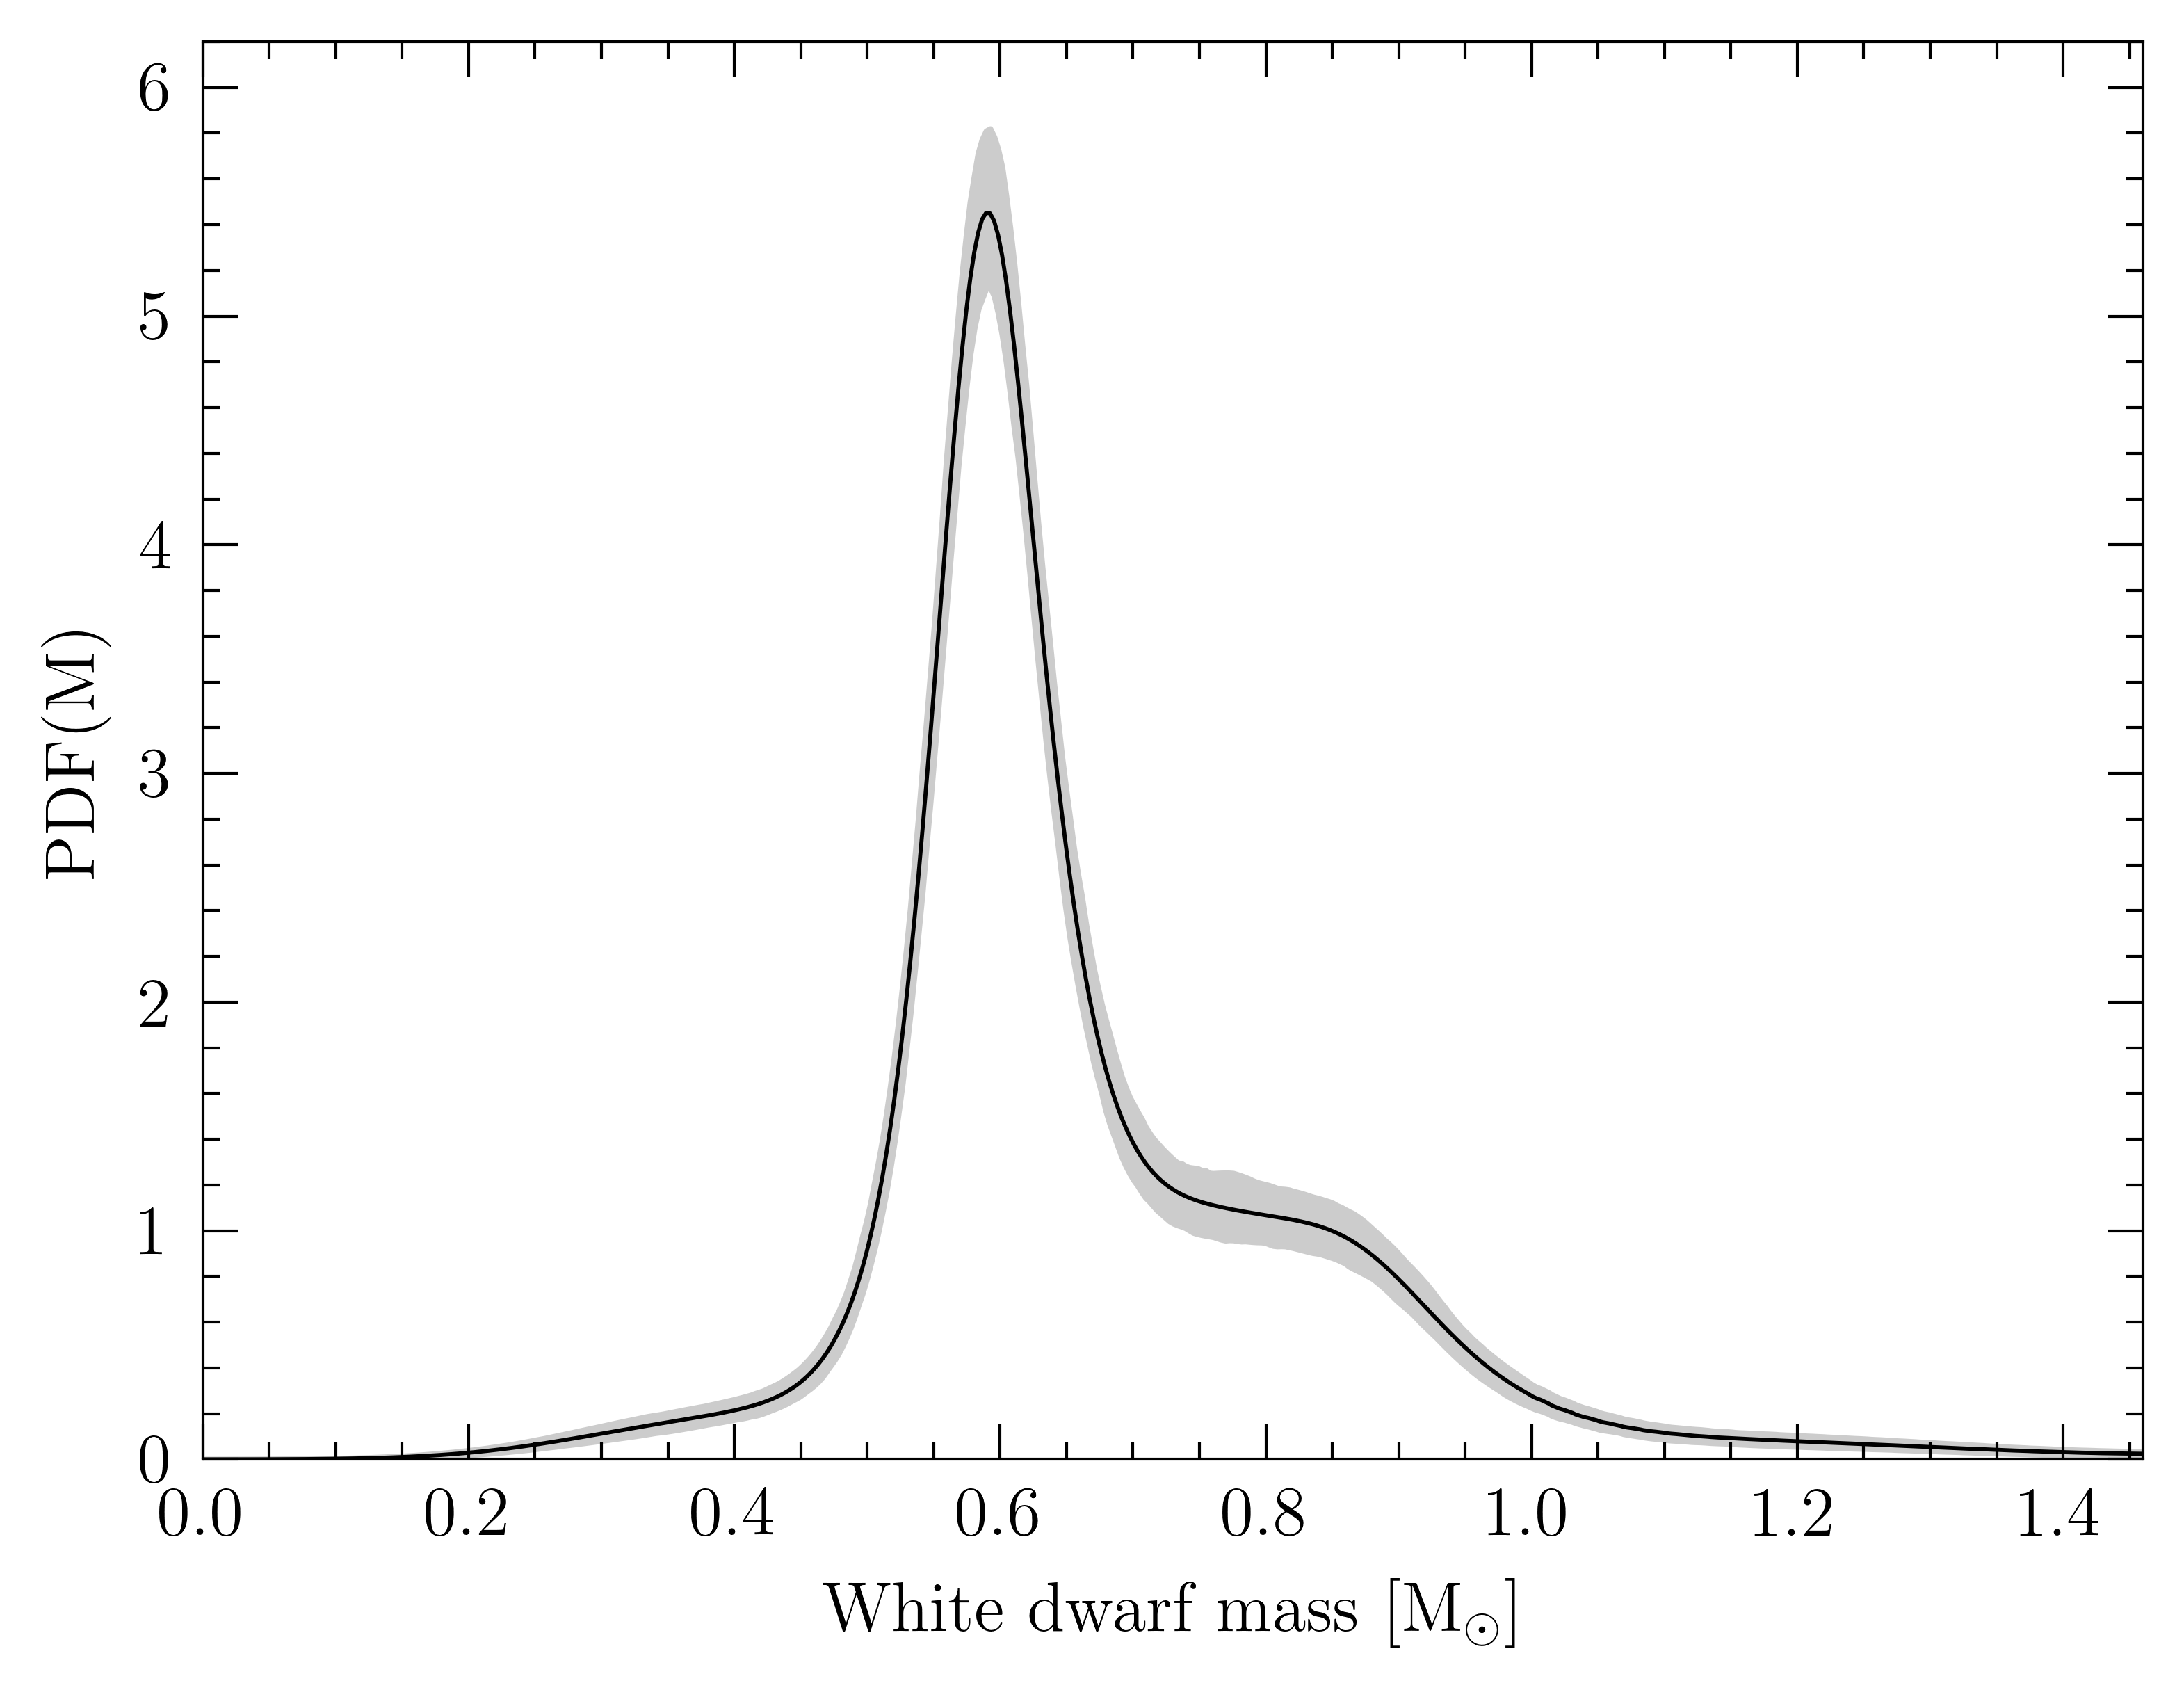

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')
ax.set_xlim(minM,maxM)
ax.set_xlabel(r'White dwarf mass [M$_\odot$]',fontsize=axisFontSize)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_ylim(minPDF,maxPDF)
ax.set_ylabel(r'PDF(M)',fontsize=axisFontSize)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))

ax.plot(mass,pdf,'-',color='black',lw=0.7,zorder=10)
ax.fill_between(mass,lower98,upper98,color='#cccccc',zorder=1)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')